<a href="https://colab.research.google.com/github/Sunkyoung/PyTorch-Study/blob/main/PyTorch_Study_02_Basic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Matplotlib Example

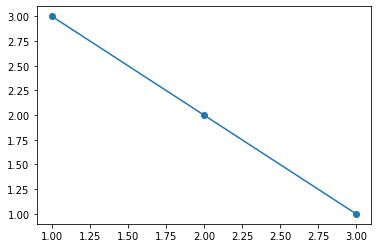

In [2]:
plt.plot([1,2,3], [3,2,1]) # (x-axis, y-axis) print line only
plt.scatter([1,2,3], [3,2,1]) # print dots only
plt.show()

In [3]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample, c="red", s=30)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

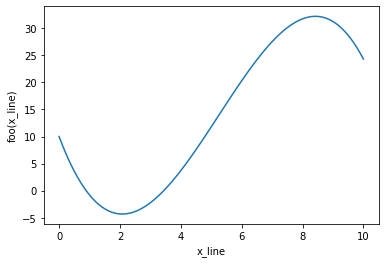

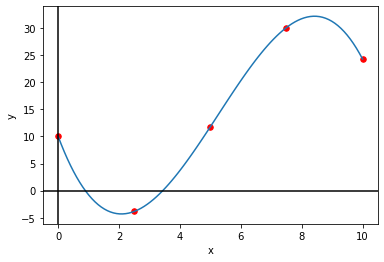

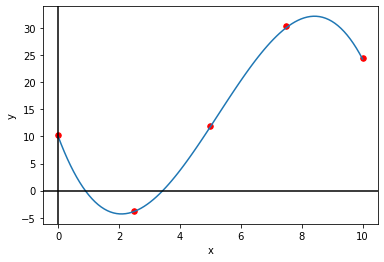

In [4]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)

# Quiz: Draw the function foo using x_line
Y = foo(x_line)
plt.plot(x_line, Y)
plt.xlabel("x_line")
plt.ylabel("foo(x_line)")
plt.show()

# Quiz: Using linspace sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
# domain: x, range: y
x_sample = np.linspace(0, 10, 5)
y_sample = foo(x_sample)
draw_plot([x_line],[Y], x_sample, y_sample)

# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
np.random.seed(0)
noise = np.random.normal(0, 0.1, 5)
x_sample = np.linspace(0, 10, 5)
y_sample = foo(x_sample) + noise
draw_plot([x_line],[Y], x_sample, y_sample)


### Linear Regression

In [5]:
print(x_sample)
print(x_sample[:,None]) # one feature, multiple batches **m x n**
print(x_sample[None,:]) # one batch, multiple features 
print(y_sample) # output for each x - 1D

[ 0.   2.5  5.   7.5 10. ]
[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
[[ 0.   2.5  5.   7.5 10. ]]
[10.17640523 -3.79926999 11.88358808 30.31337503 24.47247008]


R^2: 0.553900

Actual y[0]: 10.176405234596766
Prediction y[0]: 2.06835874325758

Mean Squared Error : 63.33334601692111



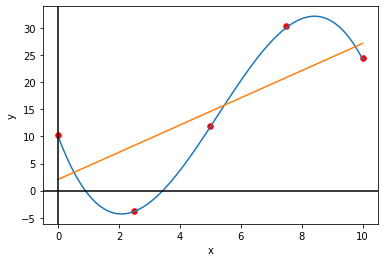

In [6]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()
x_new = x_sample[:, None]

# Training the linear regression model.
lr.fit(x_new, y_sample)

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_new, y_sample)
print("R^2: %f\n" % r2)

# Predicting a single data point.
y_hat_0 = lr.predict(x_new[0, None])
print(f"Actual y[0]: {y_sample[0]}\nPrediction y[0]: {y_hat_0[0]}\n")

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
y_hat = lr.predict(x_new)
MSE = np.mean((y_hat-y_sample)**2)
print(f'Mean Squared Error : {MSE}\n')

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
draw_plot([x_line, x_new], [Y, y_hat], x_sample, y_sample)

### Polynomial Regression

Before transform: (Single features)
[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]

After transform: (Multiple features)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04]
 [1.00000000e+00 7.50000000e+00 5.62500000e+01 4.21875000e+02
  3.16406250e+03 2.37304688e+04 1.77978516e+05]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04 1.00000000e+05 1.00000000e+06]]



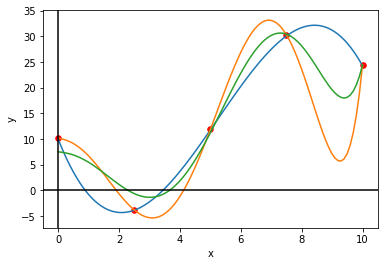

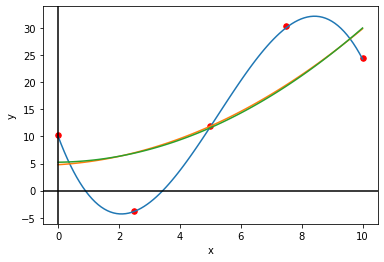

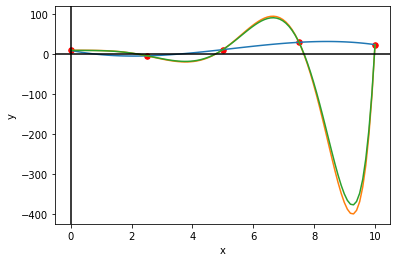

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import operator

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=6)
x_new = x_sample[:, None]

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_new)
print(f"Before transform: (Single features)\n{x_new}\n")
print(f"After transform: (Multiple features)\n{x_sample_poly}\n")

# Train a linear regression model using the polynomial features.
poly_lr = LinearRegression().fit(x_sample_poly, y_sample)
rr = Ridge(alpha=10.0).fit(x_sample_poly, y_sample) # increasing alpha -> penalize

# Quiz: Visualize the polynomial regression model, in comparison with foo.
# Transform the original x_line to poly first
x_line_poly = poly.fit_transform(x_line[:, None])

# Feed the data into polynomial linear regression
y_poly = poly_lr.predict(x_line_poly)
y_poly_rr = rr.predict(x_line_poly)

draw_plot([x_line, x_line, x_line], [Y, y_poly, y_poly_rr], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?
# Decrease Poly degree
decrease_poly = PolynomialFeatures(degree=2)
x_decrease_sample_poly = decrease_poly.fit_transform(x_new)
poly_lr_decrease = LinearRegression().fit(x_decrease_sample_poly, y_sample)
rr_decrease = Ridge(alpha=30.0).fit(x_decrease_sample_poly, y_sample)

x_line_decrease_poly = decrease_poly.fit_transform(x_line[:, None])
y_decrease_poly = poly_lr_decrease.predict(x_line_decrease_poly)
y_decrease_poly_rr = rr_decrease.predict(x_line_decrease_poly)

draw_plot([x_line, x_line, x_line], [Y, y_decrease_poly, y_decrease_poly_rr], x_sample, y_sample)

# Increase Poly degree -> overfitting
increase_poly = PolynomialFeatures(degree=8)
x_increase_sample_poly = increase_poly.fit_transform(x_new)
poly_lr_increase = LinearRegression().fit(x_increase_sample_poly, y_sample)
rr_increase = Ridge(alpha=30.0).fit(x_increase_sample_poly, y_sample)

x_line_increase_poly = increase_poly.fit_transform(x_line[:, None])
y_increase_poly = poly_lr_increase.predict(x_line_increase_poly)
y_increase_poly_rr = rr_increase.predict(x_line_increase_poly)

draw_plot([x_line, x_line, x_line], [Y, y_increase_poly, y_increase_poly_rr], x_sample, y_sample)


### Iris Dataset

In [8]:
data_path = './iris.data'
X = []
y = []

# Quiz: Fill the for loop to load the data into X and y.
with open(data_path, 'r') as fid:
    count = 0
    for line in fid:
      # fill here
      if line.strip():
        data = line.strip().split(',')
        X.append(data[:-1])
        y.append(data[-1])

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
# Easier version
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Train Test Split
Split dataset to iid

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [11]:
from sklearn.linear_model import LogisticRegression

# random_state simply sets a seed to the random generator, 
# so that your train-test splits are always deterministic
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train) # x[:, :2] -> 2 features to use among 4 features

# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1234)
svm.fit(X_train[:, :2], y_train)

# Quiz: Import Decision Tree, then train DT
from sklearn.tree import DecisionTreeClassifier
# more depth, increase decision boundary - leads to overfitting 
# similar to polynomial
dt = DecisionTreeClassifier(max_depth=2, random_state=1234) 
dt.fit(X_train[:, :2], y_train)

DecisionTreeClassifier(max_depth=2, random_state=1234)

In [12]:
# Quiz: Use the model's predict() to calculate the test accuracy.
y_logistic = logistic.predict(X_test[:, :2])
print('test accuracy (logistic) : ', (y_test == y_logistic).astype('float').mean())

y_svm = svm.predict(X_test[:, :2])
print('test accuracy (svm) : ', (y_test == y_svm).astype('float').mean())

y_dt = dt.predict(X_test[:, :2])
print('test accuracy (dt) : ', (y_test == y_dt).astype('float').mean())

test accuracy (logistic) :  0.7333333333333333
test accuracy (svm) :  0.7333333333333333
test accuracy (dt) :  0.5666666666666667


In [13]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.
print('Score function')
print('test accuracy (logistic) : ', logistic.score(X_test[:, :2], y_test))
print('test accuracy (svm)) : ', svm.score(X_test[:, :2], y_test))
print('test accuracy (dt) : ', dt.score(X_test[:, :2], y_test))

Score function
test accuracy (logistic) :  0.7333333333333333
test accuracy (svm)) :  0.7333333333333333
test accuracy (dt) :  0.5666666666666667


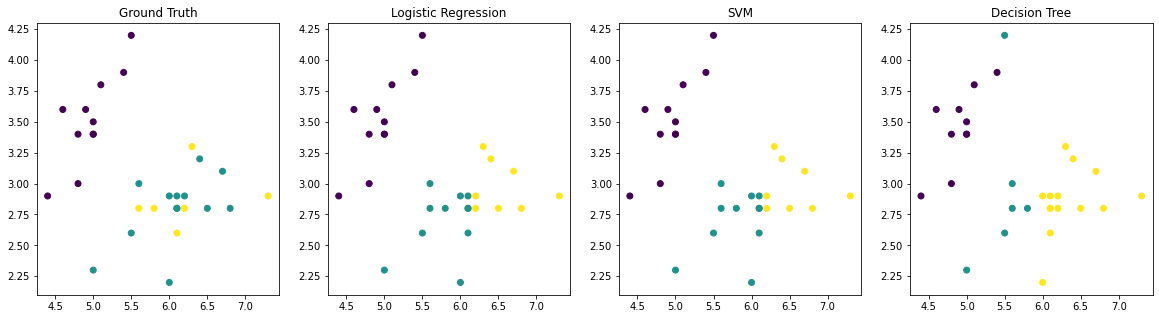

In [14]:
# Quiz: Can you draw four scatterplots for each model's predictions 
# and the true labels? (Example shown below)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

plt.subplot(142)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic)

plt.subplot(143)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svm)

plt.subplot(144)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_dt)

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)